Updated: 27/02/24

Workbook to test validity of alphas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import qnmfitsrd as qnmfits
from multiprocessing import Pool
from spatial_reconstruction import *
from matplotlib.animation import FuncAnimation
from scipy.interpolate import UnivariateSpline
from Visualisation.qnm_vis import * 
from qnmfitsrd.CCE_file_getter import *
import datetime
from scipy.optimize import least_squares

l_max = 8
n_max = 8

sim = CCE_to_sim_simplified(sim_num='0305')

In [15]:
theta_vals = np.linspace(-np.pi, np.pi, 200)
phi_vals = np.linspace(-np.pi/2, np.pi/2, 200)
theta, phi = np.meshgrid(theta_vals, phi_vals) 

wigner = spherical.Wigner(l_max)
R = quaternionic.array.from_spherical_coordinates(np.pi/2-phi, theta)
Y = wigner.sYlm(-2, R)

map = (2,2,0,1,2,2,0,1)

Try $S_{lmn} * S_{l'm'n'}$ (i.e. the sum of all $Y_{lm}$ and mixing for a particular lmn)

In [16]:
ans = np.zeros_like(theta, dtype=complex)
ans2 = np.zeros_like(theta, dtype=complex)
a, b, c, sign1, e, f, g, sign2 = map
for lp in np.arange(2, l_max+1):
    ans += qnmfits.qnm.mu(lp, b, a, b, c, sign1, sim.chif_mag) * Y[:,:,wigner.Yindex(lp, b)]
for lp in np.arange(2, l_max+1):
    ans2 += qnmfits.qnm.mu(lp, f, e, f, g, sign2, sim.chif_mag) * Y[:,:,wigner.Yindex(lp, f)]
ans_SS = ans * ans2

Try $\alpha_{lmn} * Y_{ij}$

In [17]:
ans_alpha = np.zeros_like(theta, dtype=complex)
a, b, c, sign1, e, f, g, sign2 = map
j = b + f
for i in np.arange(2, l_max+1):
    ans_alpha += qnmfits.qnm.alpha([(i,j)+map], sim.chif_mag) * Y[:,:,wigner.Yindex(i,j)]

Compare

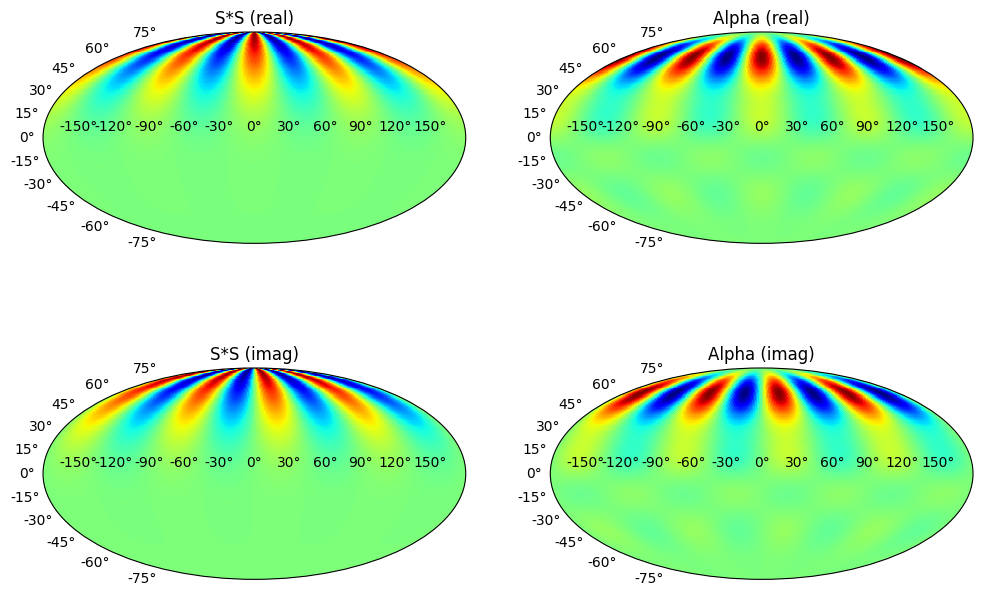

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=2, 
                        subplot_kw={'projection': 'mollweide'}, 
                        figsize=(12,8))

axs[0,0].title.set_text('S*S (real)')
axs[0,0].pcolormesh(theta, phi, np.real(ans_SS), cmap=plt.cm.jet)

axs[1,0].title.set_text('S*S (imag)')
axs[1,0].pcolormesh(theta, phi, np.imag(ans_SS), cmap=plt.cm.jet)

axs[0,1].title.set_text('Alpha (real)')
axs[0,1].pcolormesh(theta, phi, np.real(ans_alpha), cmap=plt.cm.jet)

axs[1,1].title.set_text('Alpha (imag)')
axs[1,1].pcolormesh(theta, phi, np.imag(ans_alpha), cmap=plt.cm.jet)

# Normalisation? 

In [19]:
spherical_modes = [(2,2)] 

qnms = [(l,2,0,1) for l in np.arange(2, l_max+1)]

indices_lists_l = [[lm_mode+mode for mode in qnms] for lm_mode in spherical_modes]
mu_lists = [qnm.mu_list(indices, 0.5) for indices in indices_lists_l]

sum = 0 

for mu in mu_lists:
    sum += abs(mu[0])**2 

print(sum)

0.9980192115848097


In [20]:
spherical_modes = [(4,4)] 

qnms = [(l,2,0,1,lp,2,0,1) for l in np.arange(2, l_max+1) for lp in np.arange(2,l_max+1)]

indices_lists_q = [[lm_mode+mode for mode in qnms] for lm_mode in spherical_modes]
alpha_lists = [qnm.alpha(indices, 0.5) for indices in indices_lists_q]

sum = 0 

for mu in alpha_lists:
    sum += abs(mu[0])**2

print(sum)

0.09245324307429052
